In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
from sklearn.metrics import precision_score,recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores),0.1)

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold,dtype="int")
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

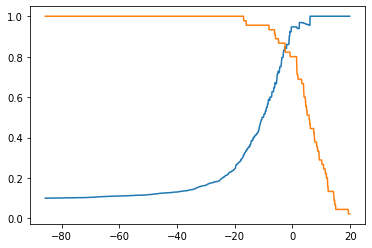

In [22]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

# precision-recall曲线

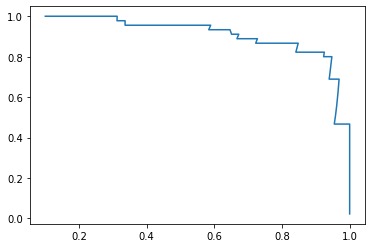

In [24]:
plt.plot(precisions, recalls)
plt.show()

In [25]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [26]:
precisions.shape

(145,)

In [27]:
recalls.shape

(145,)

In [28]:
# 最后一个精确率和召回率的值分别为0和1，该值没有对应的threshold
thresholds.shape

(144,)

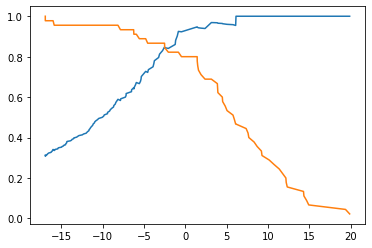

In [29]:
plt.plot(thresholds, precisions[:-1]) # 丢弃最后一个值
plt.plot(thresholds, recalls[:-1]) # 丢弃最后一个值
plt.show()

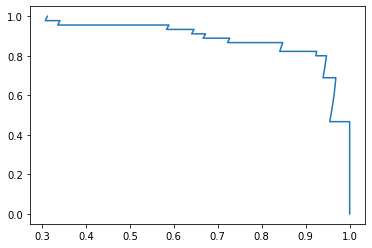

In [30]:
plt.plot(precisions, recalls)
plt.show()

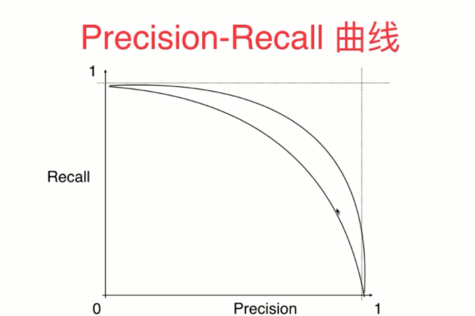

PR曲线越靠外，说明模型越好